# HDDM WORKSHOP 
## (Alexander Fengler, May 2022)

### OPTIONAL (Installation instructions)

In [ ]:
# conda create --name hddm_workshop python=3.7
# conda activate hddm_workshop

# pip install cython
# pip install pymc # if there are problems --> usually here
# pip install git+https://github.com/hddm-devs/kabuki
# pip install git+https://github.com/hddm-devs/hddm
# pip install torch torchvision torchaudio # optional

In [218]:
# MODULE IMPORTS ----

# warning settings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data management
import pandas as pd
import numpy as np
import pickle

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# Stats functionality
from statsmodels.distributions.empirical_distribution import ECDF

# HDDM
import hddm
from hddm.simulators.hddm_dataset_generators import simulator_h_c

### SIMPLE EXAMPLE:

Single Subject, basic HDDM analysis.

In [219]:
# Simulate some data
model = 'ddm_vanilla'
n_samples = 1000

data, parameter_dict = simulator_h_c(n_subjects = 1,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = None, 
                                     depends_on = None, 
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

In [220]:
# Generating parameters
parameter_dict

{'t': 1.024061508309052,
 'a': 3.1482333857066447,
 'v': -4.215259381698008,
 'z': 0.6731792304702824}

subj_idx(0)


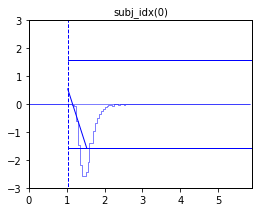

In [221]:
# Plot the dataset
hddm.plotting.plot_from_data(df = data, 
                             generative_model = 'ddm_vanilla',
                             columns = 1,
                             groupby = ['subj_idx'],
                             figsize = (4, 3),
                             value_range = np.arange(0, 6, 0.1),
                             plot_func = hddm.plotting._plot_func_model,
                             **{'alpha': 1.,
                                'ylim': 3,
                                'add_data_rts': True,
                                'add_data_model': True})
plt.show()

In [222]:
# Define the HDDM model
includes = hddm.model_config.model_config[model]['hddm_include']
n_models = 2
hddm_models = []

for i in range(n_models):
    hddm_models.append(hddm.HDDM(data,
                           informative = True,
                           is_group_model = False,
                           include = ['z'],
                           p_outlier = 0))

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm


In [223]:
# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models[i].sample(nmcmc,
                      burn = 1000)

0
 [-----------------100%-----------------] 2000 of 2000 complete in 26.7 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 27.0 sec

#### Some basic reporting

In [224]:
# Posterior Means
hddm_models[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,3.170516,0.33619,2.630314,2.898266,3.130025,3.440839,3.796537,0.033116
v,-3.886171,0.199813,-4.316795,-3.997312,-3.842082,-3.743835,-3.579305,0.018811
t,1.074256,0.028778,1.004508,1.06313,1.082195,1.094644,1.11251,0.002803
z,0.574969,0.062234,0.469449,0.524831,0.56698,0.62502,0.696242,0.0061


In [225]:
# A look at the traces
hddm_models[0].get_traces()

,a,v,t,z_trans
0,3.789674,-3.978442,1.075455,-0.078959
1,3.830226,-3.960576,1.063631,-0.073943
2,3.841262,-4.154250,1.062082,0.032857
3,3.908728,-4.096867,1.050993,0.041382
4,3.920904,-4.142607,1.052540,0.046185
...,...,...,...,...
995,3.013064,-3.812305,1.085177,0.298888
996,2.997712,-3.807223,1.089865,0.304166
997,2.969682,-3.774349,1.088519,0.300268
998,3.008745,-3.807950,1.089308,0.282829


Plotting a
Plotting v
Plotting t
Plotting z


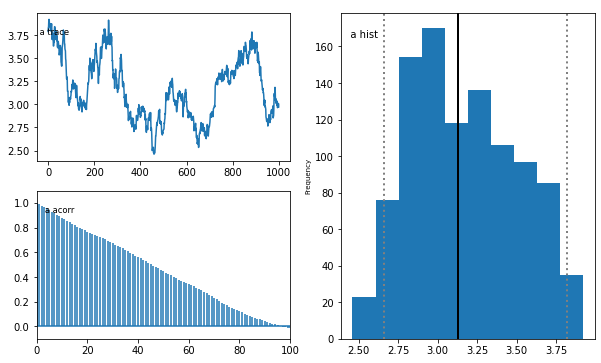

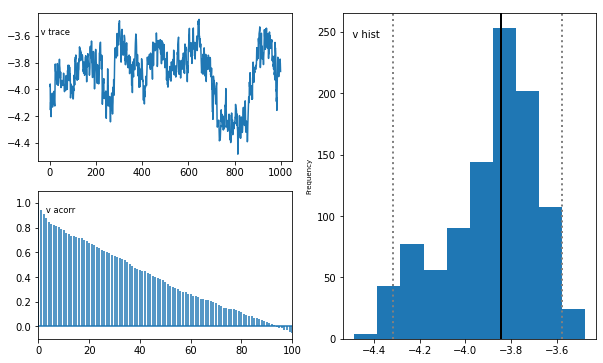

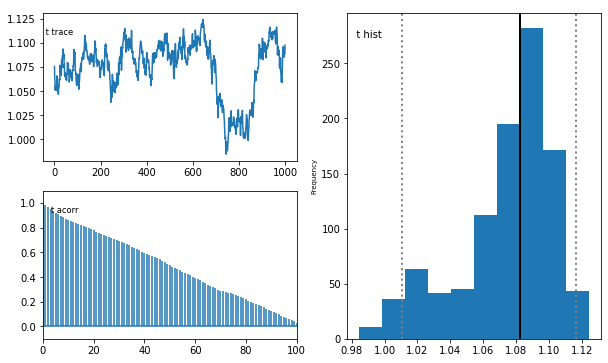

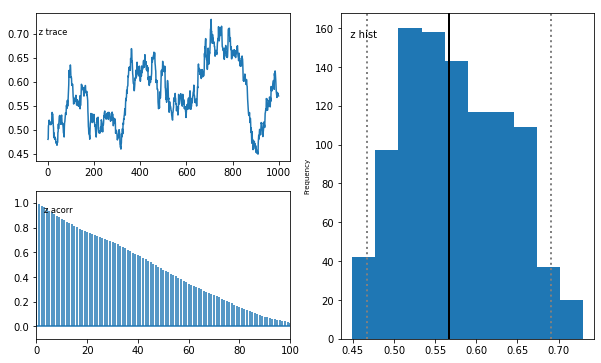

In [226]:
hddm_models[0].plot_posteriors()

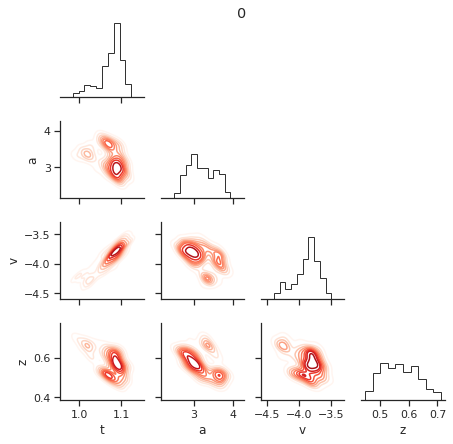

In [227]:
# Posterior Predictive Plots
hddm.plotting.plot_posterior_pair(hddm_models[0],
                                  parameter_recovery_mode = False,
                                  samples = 500,
                                  figsize = (6, 6))

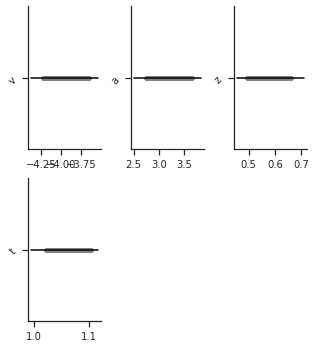

In [228]:
# Caterpillar plots
hddm.plotting.plot_caterpillar(hddm_model = hddm_models[0],
                              ground_truth_parameter_dict = None,
                              figsize = (5, 5),
                              columns = 3)

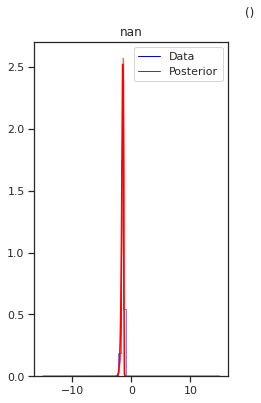

In [229]:
# Posterior Predictive
# FIX: IMPROVE LABELING
hddm.plotting.plot_posterior_predictive(model = hddm_models[0],
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(-15, 15, 0.1),
                                        parameter_recovery_mode = True,
                                        **{'alpha': 0.01,
                                           'ylim': 3,
                                           'bin_size': 0.4,
                                           'add_posterior_mean_rts': True,
                                           'add_posterior_uncertainty_rts': True,
                                           'samples': 200,
                                           'legend_fontsize': 7,
                                           'subplots_adjust': {'top': 0.9, 'hspace': 0.3, 'wspace': 0.3}})
plt.show()

#### Convergence

In [230]:
# FIX GEWEKE
from kabuki.analyze import check_geweke
print(check_geweke(hddm_models[1], assert_ = False))

Chain of knode_name           a
stochastic        True
observed         False
subj             False
node                 a
tag                 ()
depends             []
hidden           False
rt                 NaN
response           NaN
subj_idx           NaN
v                  NaN
a                  NaN
z                  NaN
t                  NaN
mean           3.04311
std           0.310059
2.5q          2.570453
25q            2.77887
50q           3.015851
75q           3.326169
97.5q         3.596451
mc err        0.030453
Name: a, dtype: object not properly converged
False


In [231]:
from kabuki.analyze import gelman_rubin
gelman_rubin(hddm_models)

{'a': 1.0560752906035815,
 'v': 1.0144921105930687,
 't': 1.0129170474088585,
 'z_trans': 1.014471848243701}

In [235]:
# Direct access to posterior predictives
posterior_predictive_sample = hddm.utils.post_pred_gen(model = hddm_models[0],
                                                       samples = 200,
                                                       groupby = ['subj_idx'],
                                                       append_data = True)

 [-----------------100%-----------------] 1 of 1 complete in 0.0 sec

In [236]:
posterior_predictive_sample

rt_sampled  response_sampled  index        rt  response  \
node sample                                                                
wfpt 0      0     -1.602769                 0      0 -1.445060       0.0   
            1     -1.529770                 0      1 -1.337061       0.0   
            2     -1.760767                 0      2 -1.475059       0.0   
            3     -1.625769                 0      3 -1.485059       0.0   
            4     -1.643769                 0      4 -1.577058       0.0   
...                     ...               ...    ...       ...       ...   
     199    995   -1.714977                 0    995 -1.602058       0.0   
            996   -1.514980                 0    996 -1.538059       0.0   
            997   -1.913975                 0    997 -1.386060       0.0   
            998   -1.568979                 0    998 -1.519059       0.0   
            999   -1.383981                 0    999 -1.678057       0.0   

                subj_idx         v         a         z         t  
node sample                                                       
wfpt 0      0          0 -4.215259  3.148233  0.673179  1.024062  
            1          0 -4.215259  3.148233  0.673179  1.024062  
            2          0 -4.215259  3.148233  0.673179  1.024062  
            3          0 -4.215259  3.148233  0.673179  1.024062  
            4          0 -4.215259  3.148233  0.673179  1.024062  
...                  ...       ...       ...       ...       ...  
     199    995        0 -4.215259  3.148233  0.673179  1.024062  
            996        0 -4.215259  3.148233  0.673179  1.024062  
            997        0 -4.215259  3.148233  0.673179  1.024062  
            998        0 -4.215259  3.148233  0.673179  1.024062  
            999        0 -4.215259  3.148233  0.673179  1.024062  

[200000 rows x 10 columns]

From here we can compute any quantity we want, comparing any aspect of our original dataset with the synthetic data we can generate via the posterior predictives.

#### Condition / Regression, simplest case

In [18]:
# Simulate some data
model = 'ddm_vanilla'
n_samples = 1000

data, parameter_dict = simulator_h_c(n_subjects = 1,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = {"my_condition": ["high", "low"]}, 
                                     depends_on = {"v": ["my_condition"]}, 
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

In [20]:
from copy import deepcopy
data_new = deepcopy(data)

In [21]:
data_new["my_condition_reg"] = 0
data_new.loc[data_new["my_condition"] == "high", "my_condition_reg"] = 1

In [24]:
data_new

,rt,response,subj_idx,my_condition,v,a,z,t,my_condition_reg
0,1.489087,1.0,0,high,1.444946,2.271022,0.374457,0.832092,1
1,1.582086,0.0,0,high,1.444946,2.271022,0.374457,0.832092,1
2,1.185091,1.0,0,high,1.444946,2.271022,0.374457,0.832092,1
3,1.314089,1.0,0,high,1.444946,2.271022,0.374457,0.832092,1
4,4.597002,1.0,0,high,1.444946,2.271022,0.374457,0.832092,1
...,...,...,...,...,...,...,...,...,...
1995,1.643085,0.0,0,low,-1.321438,2.271022,0.374457,0.832092,0
1996,1.177091,0.0,0,low,-1.321438,2.271022,0.374457,0.832092,0
1997,1.044092,0.0,0,low,-1.321438,2.271022,0.374457,0.832092,0
1998,1.737084,0.0,0,low,-1.321438,2.271022,0.374457,0.832092,0


In [25]:
# Define the HDDM model
#includes = hddm.model_config.model_config[model]['hddm_include']
#n_models = 2
hddm_models_condition = []

for i in range(n_models):
    hddm_models_condition.append(hddm.HDDM(data_new,
                                 informative = True,
                                 is_group_model = False,
                                 depends_on = {'v': 'my_condition'},
                                 include = ['z'],
                                 p_outlier = 0))

# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_condition[i].sample(nmcmc,
                                    burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 55.8 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 55.4 sec

In [30]:
hddm_models_condition[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.356637,0.041025,2.279867,2.326651,2.35805,2.383687,2.441061,0.002421
v(high),1.499348,0.04755,1.407448,1.466195,1.500868,1.531276,1.596456,0.002507
v(low),-1.350651,0.051732,-1.45025,-1.386844,-1.352298,-1.316647,-1.244703,0.002312
t,0.829494,0.006294,0.816751,0.825348,0.829955,0.833962,0.840832,0.000351
z,0.378952,0.007831,0.364791,0.373651,0.378343,0.384317,0.395453,0.000415


In [28]:
hddm_models_reg = []

def identity_link(x):
    return x

reg_models = [{'model': 'v ~ 1 + my_condition_reg', 'link_func': identity_link}]
    
for i in range(n_models):
    hddm_models_reg.append(hddm.HDDMRegressor(data_new,
                                              reg_models,
                                              informative = True,
                                              is_group_model = False,
                                              include = ['z'],
                                              p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_reg[i].sample(nmcmc,
                                    burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 92.0 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 91.6 sec

In [29]:
hddm_models_reg[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.35989,0.040998,2.281477,2.332697,2.359136,2.390019,2.438203,0.002613
t,0.828901,0.006237,0.816005,0.824958,0.828936,0.833102,0.841413,0.000377
z,0.380137,0.0076,0.365261,0.374768,0.380023,0.38526,0.395368,0.000448
v_Intercept,-1.357615,0.046938,-1.449368,-1.388892,-1.360015,-1.324845,-1.261249,0.003143
v_my_condition_reg,2.853805,0.062723,2.723389,2.813419,2.853747,2.899283,2.97028,0.004328


#### Condition / Regression, hierarchical

In [37]:
# Simulate some data
model = 'ddm_vanilla'
n_samples = 200

data, parameter_dict = simulator_h_c(n_subjects = 10,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = {"my_condition": ["high", "low"]}, 
                                     depends_on = {"v": ["my_condition"]}, 
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

In [44]:
data_new

,rt,response,subj_idx,my_condition,v,a,z,t,my_condition_reg
0,2.816587,1.0,0,high,0.835219,3.273466,0.488825,1.566585,1
1,4.291570,1.0,0,high,0.835219,3.273466,0.488825,1.566585,1
2,1.947583,1.0,0,high,0.835219,3.273466,0.488825,1.566585,1
3,3.207605,0.0,0,high,0.835219,3.273466,0.488825,1.566585,1
4,4.039588,1.0,0,high,0.835219,3.273466,0.488825,1.566585,1
...,...,...,...,...,...,...,...,...,...
3995,2.050336,0.0,9,low,-0.964855,3.296472,0.379607,1.315342,0
3996,5.013257,0.0,9,low,-0.964855,3.296472,0.379607,1.315342,0
3997,3.382375,0.0,9,low,-0.964855,3.296472,0.379607,1.315342,0
3998,4.039327,0.0,9,low,-0.964855,3.296472,0.379607,1.315342,0


In [38]:
from copy import deepcopy
data_new = deepcopy(data)

data_new["my_condition_reg"] = 0
data_new.loc[data_new["my_condition"] == "high", "my_condition_reg"] = 1

In [45]:
# Define the HDDM model
#includes = hddm.model_config.model_config[model]['hddm_include']
#n_models = 2
hddm_models_group_condition = []

for i in range(n_models):
    hddm_models_group_condition.append(hddm.HDDM(data_new,
                                 informative = True,
                                 is_group_model = True,
                                 depends_on = {'v': 'my_condition'},
                                 include = ['z'],
                                 p_outlier = 0))

# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_group_condition[i].sample(nmcmc,
                                    burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 298.5 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 295.8 sec

In [55]:
hddm_models_group_condition[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,3.317448,0.058531,3.194775,3.282828,3.316925,3.353509,3.445547,0.00311
a_std,0.121837,0.061863,0.006405,0.079691,0.116334,0.156428,0.264173,0.004853
a_subj.0,3.418448,0.101,3.259972,3.345745,3.405289,3.482944,3.651924,0.006318
a_subj.1,3.319258,0.084603,3.150814,3.267792,3.317578,3.37206,3.503707,0.004422
a_subj.2,3.264067,0.081273,3.092753,3.212456,3.26731,3.31789,3.414723,0.004165
a_subj.3,3.225645,0.092599,3.024777,3.167352,3.232558,3.295403,3.384208,0.005551
a_subj.4,3.270801,0.083951,3.102235,3.21242,3.277535,3.328232,3.422703,0.004411
a_subj.5,3.272946,0.087516,3.097726,3.215609,3.27662,3.331258,3.434013,0.004909
a_subj.6,3.370714,0.096358,3.19132,3.308464,3.362746,3.423854,3.604265,0.005687
a_subj.7,3.451203,0.101166,3.287236,3.376235,3.44215,3.517821,3.678364,0.006755


In [40]:
hddm_models_group_reg = []

def identity_link(x):
    return x

reg_models = [{'model': 'v ~ 1 + my_condition_reg', 'link_func': identity_link}]
    
for i in range(n_models):
    hddm_models_group_reg.append(hddm.HDDMRegressor(data_new,
                                              reg_models,
                                              informative = True,
                                              is_group_model = True,
                                              group_only_regressors = False,
                                              include = ['z'],
                                              p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_group_reg[i].sample(nmcmc,
                              burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 409.8 sec1
 [-----------------100%-----------------] 2000 of 2000 complete in 413.8 sec

In [41]:
hddm_models_group_reg[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,3.30862,0.056943,3.207811,3.27775,3.312758,3.337064,3.423809,0.002931
a_std,0.107257,0.081462,0.001054,0.048634,0.100588,0.151929,0.309264,0.006855
a_subj.0,3.401728,0.099533,3.25381,3.31664,3.389322,3.472514,3.619588,0.007382
a_subj.1,3.309221,0.075843,3.148629,3.265489,3.312015,3.348341,3.476341,0.00376
a_subj.2,3.272685,0.075899,3.106862,3.224345,3.279224,3.318723,3.415969,0.004314
a_subj.3,3.24146,0.0913,3.030957,3.18415,3.257691,3.313565,3.394187,0.00601
a_subj.4,3.267143,0.079196,3.097643,3.22134,3.274279,3.316175,3.419832,0.004535
a_subj.5,3.273312,0.074903,3.113044,3.229248,3.280516,3.317389,3.420525,0.004326
a_subj.6,3.330281,0.081899,3.184771,3.28285,3.317217,3.376642,3.52058,0.004731
a_subj.7,3.430437,0.118059,3.269681,3.320426,3.411627,3.502701,3.696629,0.008799


#### Regression + depends_on

In [38]:
# Simulate some data
model = 'ddm_vanilla'
n_samples = 200

data, parameter_dict = simulator_h_c(n_subjects = 10,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = {"my_condition": ["high", "low"]}, 
                                     depends_on = {"v": ["my_condition"]}, 
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

In [39]:
data_new = deepcopy(data)
data_new["my_condition_reg"] = 0
data_new.loc[data["my_condition"] == "high", "my_condition_reg"] = 1

In [40]:
data_new["randcol"] = np.random.uniform(low = -1, high = 1, size = data_new.shape[0])

In [41]:
hddm_models_group_reg_depends = []

def identity_link(x):
    return x

reg_models = [{'model': 'v ~ 1 + randcol', 'link_func': identity_link}]
    
for i in range(n_models):
    hddm_models_group_reg_depends.append(hddm.HDDMRegressor(data_new,
                                              reg_models,
                                              depends_on = {'v': ['my_condition']},
                                              informative = True,
                                              is_group_model = True,
                                              std_depends = True,
                                              group_only_regressors = False,
                                              include = ['z'],
                                              p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_group_reg_depends[i].sample(nmcmc,
                                            burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2001 of 2000 complete in 587.5 sec

In [42]:
hddm_models_group_reg_depends[0].gen_stats()[25:50]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
z_std,0.102684,0.024171,0.057931,0.086993,0.101393,0.117627,0.151707,0.001427
z_subj.0,0.413369,0.014913,0.383591,0.403555,0.413233,0.423083,0.443198,0.000825
z_subj.1,0.386813,0.013977,0.357322,0.377294,0.387316,0.395517,0.413644,0.000647
z_subj.2,0.376404,0.014139,0.348811,0.36674,0.375752,0.386271,0.405162,0.000661
z_subj.3,0.403771,0.014924,0.374498,0.393583,0.403861,0.413832,0.43412,0.00082
z_subj.4,0.42611,0.015274,0.396572,0.415345,0.425568,0.437214,0.455601,0.000842
z_subj.5,0.391867,0.015472,0.360983,0.382067,0.391477,0.401225,0.425725,0.000892
z_subj.6,0.366345,0.014991,0.338337,0.356246,0.366112,0.376962,0.395316,0.000827
z_subj.7,0.410237,0.014381,0.383989,0.400026,0.409458,0.419461,0.442028,0.000695
z_subj.8,0.344761,0.01579,0.315043,0.333926,0.344502,0.354455,0.377851,0.001007


In [ ]:
hddm_models_group_reg_depends = []

def identity_link(x):
    return x

reg_models = [{'model': 'v ~ 1 + randcol', 'link_func': identity_link}]
    
for i in range(n_models):
    hddm_models_group_reg_depends.append(hddm.HDDMRegressor(data_new,
                                              reg_models,
                                              depends_on = {'v': ['my_condition']},
                                              informative = True,
                                              is_group_model = True,
                                              group_only_regressors = False,
                                              include = ['z'],
                                              p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(n_models):
    print(i)
    hddm_models_group_reg_depends[i].sample(nmcmc,
                                            burn = 1000)

### LINK FUNCTIONS

In [9]:
# Simulate some data
model = 'ddm_vanilla'
n_samples = 1000

data, parameter_dict = simulator_h_c(n_subjects = 1,
                                     n_trials_per_subject = n_samples,
                                     model = model,
                                     p_outlier = 0.00,
                                     conditions = None, 
                                     depends_on = None,
                                     regression_models = None,
                                     regression_covariates = None,
                                     group_only_regressors = False,
                                     group_only = None,
                                     fixed_at_default = None)

new round of data simulation because parameter bounds where violated


In [10]:
from copy import deepcopy
#data_new = deepcopy(data)
#data_new["my_condition_reg"] = 0
#data_new.loc[data_new["my_condition"] == "high", "my_condition_reg"] = 1

In [11]:
parameter_dict

{'z': 0.6244034493124617,
 'a': 2.996495757826711,
 'v': 0.9500842870402777,
 't': 1.2714801346405782}

##### SOME NOTES:

In principle you are free to choose link function as you please. 
The general model you will fit is of the following form (take the drift parameter as an example):

$$ \hat{v} = link(\mathbf{X} \beta) $$

Using the **identity link** leaves us with,

$$ \hat{v} = \mathbf{X} \beta $$

Using the **logistic link** leave us with,

$$ \hat{v} = \frac{1}{1 + \exp( - \mathbf{X} \beta)} $$

The **identity function** will most often be the right choice.

In [ ]:
def my_link(Xb):
    .....
    return out

#### EXAMPLE 1: IDENTITY LINK ON Z

In [20]:
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

reg_models = [{'model': 'z ~ 1', 'link_func': identity_link},
              {'model': 'v ~ 1', 'link_func': identity_link}]

hddm_models_link_id = []
n_models = 1

for i in range(n_models):
    hddm_models_link_id.append(hddm.HDDMRegressor(data,
                                               reg_models,
                                               informative = True,
                                               is_group_model = False,
                                               group_only_regressors = True,
                                               include = ['z'],
                                               p_outlier = 0))
    
# Sample
nmcmc = 750
for i in range(1):
    print(i)
    hddm_models_link_id[i].sample(nmcmc,
                                  burn = 250)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 750 of 750 complete in 24.0 sec

In [21]:
hddm_models_link_id[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.962283,0.086688,2.797645,2.902693,2.956933,3.016223,3.136431,0.007017
t,1.251951,0.01866,1.211169,1.239599,1.254286,1.266282,1.279916,0.001585
z_Intercept,0.586082,0.018373,0.551897,0.57351,0.587491,0.598053,0.620815,0.001584
v_Intercept,1.019493,0.046311,0.9202,0.990124,1.017311,1.051964,1.111731,0.003512


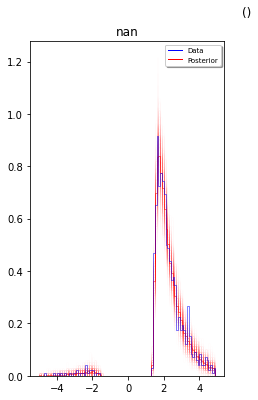

In [22]:
# Posterior Predictive
hddm.plotting.plot_posterior_predictive(model = hddm_models_link_id[0],
                                        columns = 2, # groupby = ['subj_idx'],
                                        figsize = (8, 6),
                                        value_range = np.arange(-5, 5, 0.05),
                                        parameter_recovery_mode = False,
                                        required_method="random",
                                        plot_func = hddm.plotting._plot_func_posterior_node_from_sim,
                                        **{'alpha': 0.01,
                                           'ylim': 3,
                                           'bin_size': 0.1,
                                           'add_posterior_mean_rts': True,
                                           'add_posterior_uncertainty_rts': True,
                                           'plot_likelihood_raw': False,
                                           'samples': 200,
                                           'legend_fontsize': 7,
                                           'subplots_adjust': {'top': 0.9, 'hspace': 0.3, 'wspace': 0.3},
                                           'posterior_uncertainty_color': 'red'})

#### EXAMPLE 2: LOGIT LINK ON Z

In [19]:
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

reg_models = [{'model': 'z ~ 1', 'link_func': logit_link},
              {'model': 'v ~ 1', 'link_func': identity_link}]

hddm_models_link_logit = []
n_models = 1

for i in range(n_models):
    hddm_models_link_logit.append(hddm.HDDMRegressor(data,
                                               reg_models,
                                               informative = True,
                                               is_group_model = False,
                                               group_only_regressors = True,
                                               include = ['z'],
                                               p_outlier = 0))
    
# Sample
nmcmc = 750
for i in range(1):
    print(i)
    hddm_models_link_logit[i].sample(nmcmc,
                                     burn = 250)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 750 of 750 complete in 24.5 sec

In [23]:
hddm_models_link_id[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.962283,0.086688,2.797645,2.902693,2.956933,3.016223,3.136431,0.007017
t,1.251951,0.01866,1.211169,1.239599,1.254286,1.266282,1.279916,0.001585
z_Intercept,0.586082,0.018373,0.551897,0.57351,0.587491,0.598053,0.620815,0.001584
v_Intercept,1.019493,0.046311,0.9202,0.990124,1.017311,1.051964,1.111731,0.003512


##### NOTES:

When the **logit link** is used (any link), we have to transform the **z_Intercept** parameter.

In [31]:
z_intercept = hddm_models_link_id[0].gen_stats().loc['z_Intercept', 'mean']

print('Computed z')
print( 1 / (1 + np.exp(-z_intercept)))

print('Ground Truth z')
print(parameter_dict['z'])

Computed z
0.642465688267727
Ground Truth z
0.6244034493124617


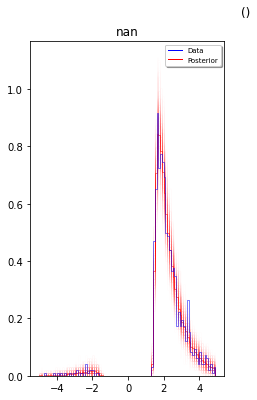

In [24]:
# Posterior Predictive
hddm.plotting.plot_posterior_predictive(model = hddm_models_link_id[0],
                                        columns = 2,
                                        figsize = (8, 6),
                                        value_range = np.arange(-5, 5, 0.05),
                                        parameter_recovery_mode = False,
                                        required_method="random",
                                        plot_func = hddm.plotting._plot_func_posterior_node_from_sim,
                                        **{'alpha': 0.01,
                                           'ylim': 3,
                                           'bin_size': 0.1,
                                           'add_posterior_mean_rts': True,
                                           'add_posterior_uncertainty_rts': True,
                                           'plot_likelihood_raw': False,
                                           'samples': 200,
                                           'legend_fontsize': 7,
                                           'subplots_adjust': {'top': 0.9, 'hspace': 0.3, 'wspace': 0.3},
                                           'posterior_uncertainty_color': 'red'})

#### EXAMPLE 3: LESS STANDARD USE CASE / STIMULUS CODING

We will refer to the slides to discuss stimulus coding, before proceeding to the example.

In [81]:
# Simulate some StimCoding Data
v = np.concatenate([np.ones(500), - np.ones(500)])
a = 3
z = 0.5
t = 1

theta = np.zeros((n_trials, 4))
theta[:, 0] = v
theta[:, 1] = a
theta[:, 2] = z
theta[:, 3] = t

In [91]:
sim_out = hddm.simulators.simulator(theta = theta, 
                                 model = 'ddm_vanilla',
                                 n_samples = 1,
                                 max_t = 40)

data = pd.DataFrame(np.hstack([sim_out[0], sim_out[1], theta]), columns = ['rt', 'response', 'v', 'a', 'z', 't'])
data['stim'] = 2
data.loc[data['v'] == -1., 'stim'] = 1

##### VIA STIMCODING

In [95]:

hddm_models_stim = []
n_models = 1

for i in range(n_models):
    hddm_models_stim.append(hddm.HDDMStimCoding(data,
                                                split_param = 'v',
                                                stim_col = 'stim',
                                                informative = True,
                                                is_group_model = False,
                                                include = ['z'],
                                                p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_stim[i].sample(nmcmc,
                               burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm


AttributeError: 'KnodeWfptStimCoding' object has no attribute 'split_var'

In [93]:
hddm_models_stim[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.999686,0.07036,2.856126,2.95434,3.00039,3.049367,3.136679,0.003759
v,1.008832,0.033041,0.941729,0.986827,1.009433,1.032567,1.070537,0.001357
t,0.998351,0.016251,0.96596,0.98805,0.998152,1.009895,1.029822,0.000837
z,0.492065,0.008366,0.476021,0.486519,0.491858,0.49752,0.509226,0.000265


##### VIA REGRESSION

In [105]:
from patsy import dmatrix
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

def stim_coding(x, data = data):
    stim = np.squeeze((np.asarray(dmatrix('0 + C(s,[[-1],[1]])', {'s':data.stim.loc[x.index]}))))
    return x * stim
    

reg_models = [{'model': 'z ~ 1', 'link_func': identity_link},
              {'model': 'v ~ 1', 'link_func': stim_coding}]

hddm_models_stim_reg = []
n_models = 1

for i in range(n_models):
    hddm_models_stim_reg.append(hddm.HDDMRegressor(data,
                                                       reg_models,
                                                       informative = True,
                                                       is_group_model = False,
                                                       group_only_regressors = True,
                                                       include = ['z'],
                                                       p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_stim_reg[i].sample(nmcmc,
                                       burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2001 of 2000 complete in 120.2 sec

In [106]:
hddm_models_stim_reg[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.998028,0.067035,2.880808,2.950406,2.994979,3.041679,3.134767,0.003926
t,0.999226,0.015331,0.966724,0.989258,0.999124,1.009794,1.028314,0.000844
z_Intercept,0.491991,0.008034,0.476157,0.486405,0.492158,0.497611,0.507695,0.000234
v_Intercept,1.009482,0.03226,0.944958,0.987241,1.011654,1.031655,1.068331,0.001306


##### VIA REGRESSION (VIA COLUMN TRANSFORM)

In [117]:
data['stimalt'] = 1
data.loc[data['stim'] == 2, 'stimalt'] = -1

In [118]:
data

,rt,response,v,a,z,t,stim,stim_alt,stimalt
0,3.663989,1.0,1.0,3.0,0.5,1.0,2,1,-1
1,1.570996,0.0,1.0,3.0,0.5,1.0,2,1,-1
2,1.363999,1.0,1.0,3.0,0.5,1.0,2,1,-1
3,1.680995,1.0,1.0,3.0,0.5,1.0,2,1,-1
4,3.911971,1.0,1.0,3.0,0.5,1.0,2,1,-1
...,...,...,...,...,...,...,...,...,...
995,2.865031,0.0,-1.0,3.0,0.5,1.0,1,1,1
996,2.775027,0.0,-1.0,3.0,0.5,1.0,1,1,1
997,5.084887,0.0,-1.0,3.0,0.5,1.0,1,1,1
998,2.433011,0.0,-1.0,3.0,0.5,1.0,1,1,1


In [119]:
from patsy import dmatrix
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

def stim_coding(x, data = data):
    stim = np.squeeze((np.asarray(dmatrix('0 + C(s,[[-1],[1]])', {'s':data.stim.loc[x.index]}))))
    return x * stim

def stim_coding_alt(x, data = data):
    return x * data.stim_alt.loc[x.index].values
    

reg_models = [{'model': 'z ~ 1', 'link_func': identity_link},
              {'model': 'v ~ 0 + stimalt', 'link_func': stim_coding_alt}]

hddm_models_stim_reg_alt = []
n_models = 1

for i in range(n_models):
    hddm_models_stim_reg_alt.append(hddm.HDDMRegressor(data,
                                                       reg_models,
                                                       informative = True,
                                                       is_group_model = False,
                                                       group_only_regressors = True,
                                                       include = ['z'],
                                                       p_outlier = 0))
    
# Sample
nmcmc = 1000
for i in range(1):
    print(i)
    hddm_models_stim_reg_alt[i].sample(nmcmc,
                                       burn = 500)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 1000 of 1000 complete in 34.6 sec

In [120]:
hddm_models_stim_reg_alt[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.996692,0.079215,2.845401,2.93982,2.995353,3.052009,3.156828,0.00607
t,0.998186,0.017541,0.965477,0.985565,0.998262,1.011595,1.030777,0.001224
z_Intercept,0.492014,0.007864,0.477332,0.486677,0.491695,0.497362,0.507999,0.00038
v_stimalt,-1.006926,0.035094,-1.082137,-1.029565,-1.006874,-0.984938,-0.938002,0.002205


### REGRESSION WITH INTERACTION (CONTINUOUS REGRESSORS)

In [6]:
# Make data
n_trials = 1000

beta_v_intercept = 1
beta_v_cov_1 = 1
beta_v_cov_2 = -1
beta_v_interaction = 0.5
cov_1 = np.random.uniform(low = -1, high = 1, size = n_trials)
cov_2 = np.random.uniform(low = -1, high = 1, size = n_trials)
v = beta_v_intercept + beta_v_cov_1 * cov_1 + beta_v_cov_2 * cov_2 + beta_v_interaction * cov_1 * cov_2
a = 3
t = 1
z = 0.4

theta = np.zeros((n_trials, 4))
theta[:, 0] = v
theta[:, 1] = a
theta[:, 2] = z
theta[:, 3] = t

In [14]:
sim_out = hddm.simulators.simulator(theta = theta, 
                                 model = 'ddm_vanilla',
                                 n_samples = 1,
                                 max_t = 40)

data = pd.DataFrame(np.hstack([sim_out[0], sim_out[1], theta]), columns = ['rt', 'response', 'v', 'a', 'z', 't'])
data['cov_1'] = v_cov_1
data['cov_2'] = v_cov_2

In [16]:
data

,rt,response,v,a,z,t,v_cov_1,v_cov_2
0,2.815029,1.0,1.176724,3.0,0.4,1.0,0.774156,0.974727
1,1.550997,1.0,1.165940,3.0,0.4,1.0,0.646175,0.709449
2,1.932992,1.0,1.637832,3.0,0.4,1.0,0.905936,0.490107
3,3.554997,1.0,-0.111698,3.0,0.4,1.0,-0.595210,0.398032
4,3.679988,1.0,-0.014256,3.0,0.4,1.0,-0.925411,0.060740
...,...,...,...,...,...,...,...,...
995,1.881992,1.0,1.135116,3.0,0.4,1.0,-0.426116,-0.462659
996,2.277004,1.0,2.077761,3.0,0.4,1.0,0.908502,-0.310142
997,2.436011,0.0,-0.941605,3.0,0.4,1.0,-0.904221,0.714398
998,3.518000,1.0,1.214360,3.0,0.4,1.0,0.293306,0.092513


In [17]:
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

reg_models = [{'model': 'z ~ 1', 'link_func': identity_link},
              {'model': 'v ~ 1 + cov_1 * cov_2', 'link_func': identity_link}]

hddm_models_reg_interact = []
n_models = 1

for i in range(n_models):
    hddm_models_reg_interact.append(hddm.HDDMRegressor(data,
                                                  reg_models,
                                                  informative = True,
                                                  is_group_model = False,
                                                  group_only_regressors = True,
                                                  include = ['z'],
                                                  p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_reg_interact[i].sample(nmcmc,
                                       burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 126.3 sec

In [18]:
hddm_models_reg_interact[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.990555,0.063674,2.8709,2.947612,2.988958,3.030955,3.120215,0.003838
t,1.009343,0.016636,0.973911,0.998563,1.010663,1.020447,1.04023,0.000983
z_Intercept,0.40744,0.01079,0.385895,0.401214,0.407531,0.414188,0.428458,0.000486
v_Intercept,1.02141,0.037948,0.946734,0.996311,1.022406,1.046082,1.092953,0.002013
v_v_cov_1,0.984485,0.053373,0.881292,0.947242,0.985126,1.020934,1.091863,0.002018
v_v_cov_2,-1.005724,0.052218,-1.105312,-1.041602,-1.00572,-0.971175,-0.895825,0.002101
v_v_cov_1:v_cov_2,0.619748,0.080762,0.462333,0.566031,0.622346,0.675544,0.77894,0.002877


##### NOTES:

A note on the interpretation of the **beta coefficients**. 
Let's say we as whether our interaction term is "*significantly*" different from 0.

We can plot the trace and signify e.g. it's $5th$ percentile. 
If the $5th$ percentile is above 0 (or the $95th$ percentile below 0) we can conclude with some confidence that 
there is a **positive interaction** (negative interaction) between *cov_1* and *cov_2*.


(0.0, 1.0)

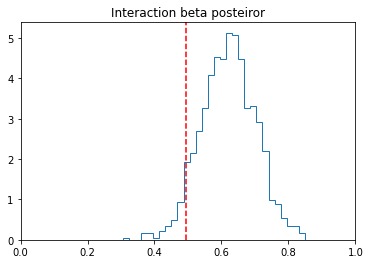

In [43]:
interaction_trace = hddm_models_reg_interact[0].get_traces()['v_v_cov_1:v_cov_2'].values
interaction_trace_sorted = np.sort(interaction_trace)

percentile = 0.05
plt.hist(interaction_trace, bins = 30, histtype = 'step', density = True)
plt.axvline(x = interaction_trace_sorted[int(np.floor(percentile * interaction_trace.shape[0]))], 
            color = 'red', linestyle = 'dashed')
plt.title('Interaction beta posteiror')
plt.xlim((0, 1))

### REGRESSION WITH INTERACTION (CATEGORICAL COVARIATES)

This example comes closest to **ANOVA** style analysis.

In [74]:
# Make data
n_trials = 1000

beta_v_intercept = 1
beta_v_cov_1 = 1
beta_v_cov_2 = -1
beta_v_interaction = 0.5
cov_1 = np.concatenate([np.ones(500), np.zeros(500)]) #np.random.uniform(low = -1, high = 1, size = n_trials)
cov_2 = np.concatenate([np.ones(250), np.zeros(250), np.ones(250), np.zeros(250)]) # np.random.uniform(low = -1, high = 1, size = n_trials)
v = beta_v_intercept + beta_v_cov_1 * cov_1 + beta_v_cov_2 * cov_2 + beta_v_interaction * cov_1 * cov_2
a = 3
t = 1
z = 0.4

theta = np.zeros((n_trials, 4))
theta[:, 0] = v
theta[:, 1] = a
theta[:, 2] = z
theta[:, 3] = t

In [75]:
sim_out = hddm.simulators.simulator(theta = theta, 
                                    model = 'ddm_vanilla',
                                    n_samples = 1,
                                    max_t = 40)

data = pd.DataFrame(np.hstack([sim_out[0], sim_out[1], theta]), columns = ['rt', 'response', 'v', 'a', 'z', 't'])
data['cov_1'] = cov_1
data['cov_2'] = cov_2
data['cov_1'] = data['cov_1'].apply(str)
data['cov_2'] = data['cov_2'].apply(str)

In [76]:
data

,rt,response,v,a,z,t,cov_1,cov_2
0,2.496014,1.0,1.5,3.0,0.4,1.0,1.0,1.0
1,3.731984,1.0,1.5,3.0,0.4,1.0,1.0,1.0
2,1.659995,1.0,1.5,3.0,0.4,1.0,1.0,1.0
3,1.381999,1.0,1.5,3.0,0.4,1.0,1.0,1.0
4,2.053993,1.0,1.5,3.0,0.4,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
995,3.664989,1.0,1.0,3.0,0.4,1.0,0.0,0.0
996,2.107996,1.0,1.0,3.0,0.4,1.0,0.0,0.0
997,2.306005,1.0,1.0,3.0,0.4,1.0,0.0,0.0
998,1.322999,1.0,1.0,3.0,0.4,1.0,0.0,0.0


In [77]:
def identity_link(x):
    return x

def logit_link(x):
    return 1 / (1 + np.exp(-x))

reg_models = [{'model': 'z ~ 1', 'link_func': identity_link},
              {'model': 'v ~ 1 + cov_1 * cov_2', 'link_func': identity_link}]

hddm_models_reg_interact = []
n_models = 1

for i in range(n_models):
    hddm_models_reg_interact.append(hddm.HDDMRegressor(data,
                                                       reg_models,
                                                       informative = True,
                                                       is_group_model = False,
                                                       group_only_regressors = True,
                                                       include = ['z'],
                                                       p_outlier = 0))
    
# Sample
nmcmc = 2000
for i in range(1):
    print(i)
    hddm_models_reg_interact[i].sample(nmcmc,
                                       burn = 1000)

No model attribute --> setting up standard HDDM
Set model to ddm
0
 [-----------------100%-----------------] 2000 of 2000 complete in 121.4 sec

In [78]:
hddm_models_reg_interact[0].gen_stats()

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.968964,0.061576,2.856042,2.928015,2.968008,3.008709,3.10151,0.003202
t,1.022389,0.015861,0.988387,1.012346,1.022993,1.032876,1.053022,0.000816
z_Intercept,0.428118,0.012456,0.403436,0.419798,0.428288,0.436444,0.453755,0.000663
v_Intercept,0.959626,0.057567,0.837575,0.920017,0.964989,0.999546,1.063149,0.004028
v_cov_1[T.1.0],0.881917,0.085257,0.727892,0.825368,0.880107,0.934898,1.057236,0.00615
v_cov_2[T.1.0],-1.086438,0.068873,-1.226517,-1.131196,-1.08587,-1.044285,-0.942103,0.004708
v_cov_1[T.1.0]:cov_2[T.1.0],0.739727,0.11615,0.510408,0.663784,0.741386,0.818245,0.966399,0.008255


### HOW MUCH DO PRIORS MATTER ?

In [209]:
n_samples = 10000
parameters = hddm.model_config.model_config['ddm_vanilla']['params_default']
parameters[hddm.model_config.model_config['ddm_vanilla']['params'].index('t')] = 0.5

theta = np.zeros((n_samples, 4))
theta[:, 0] = parameters[hddm.model_config.model_config['ddm_vanilla']['params'].index('v')]
theta[:, 1] = parameters[hddm.model_config.model_config['ddm_vanilla']['params'].index('a')]
theta[:, 2] = parameters[hddm.model_config.model_config['ddm_vanilla']['params'].index('z')]
theta[:, 3] = parameters[hddm.model_config.model_config['ddm_vanilla']['params'].index('t')]

sim_out = hddm.simulators.simulator(theta = parameters, 
                                    model = 'ddm_vanilla',
                                    n_samples = n_samples,
                                    max_t = 40)

data = pd.DataFrame(np.hstack([sim_out[0], sim_out[1], theta]), columns = ['rt', 'response', 'v', 'a', 'z', 't'])

In [212]:
from copy import deepcopy
sample_sizes = [32, 64, 128, 256, 512, 1024]
stats_list = []
trace_list = []

for n_samples_tmp in sample_sizes:
    print(n_samples_tmp)
    data_tmp = data.sample(n_samples_tmp).reset_index(drop = True)
    
    # Informative
    hddm_model_tmp = hddm.HDDM(data_tmp,
                               informative = True,
                               is_group_model = False,
                               include = ['z'],
                               p_outlier = 0)
    hddm_model_tmp.sample(1000, burn = 500)
    
    # Save traces
    tmp_traces = hddm_model_tmp.get_traces()
    tmp_traces['informative'] = 1
    tmp_traces['sample_size'] = n_samples_tmp
    trace_list.append(deepcopy(tmp_traces))
    
    # Uninformative
    hddm_model_tmp = hddm.HDDM(data_tmp,
                               informative = False,
                               is_group_model = False,
                               include = ['z'],
                               p_outlier = 0)
    hddm_model_tmp.sample(1000, burn = 500)
    
    # Save traces
    tmp_traces = hddm_model_tmp.get_traces()
    tmp_traces['informative'] = 0
    tmp_traces['sample_size'] = n_samples_tmp
    trace_list.append(deepcopy(tmp_traces))
    
    
trace_df['sample_size'] = trace_df['sample_size'].apply(str)
trace_df = pd.concat(trace_list)

32
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.5 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.5 sec64
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.4 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.4 sec128
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.3 secNo model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 6.3 sec256
No model attribute --> setting up standard HDDM
Set model to ddm
 [-----------------100%-----------------] 1000 of 1000 complete in 7.3 secNo model attr

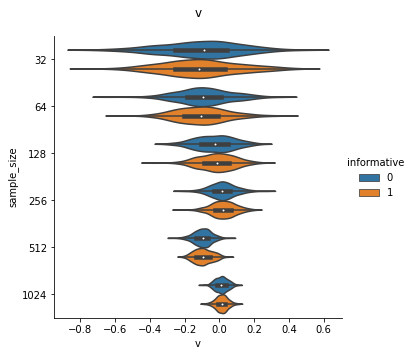

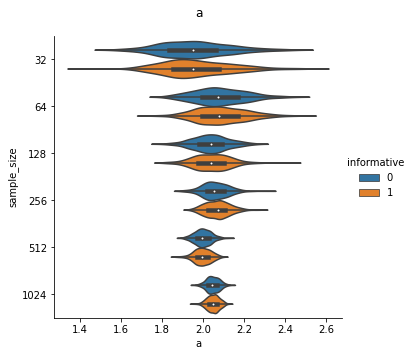

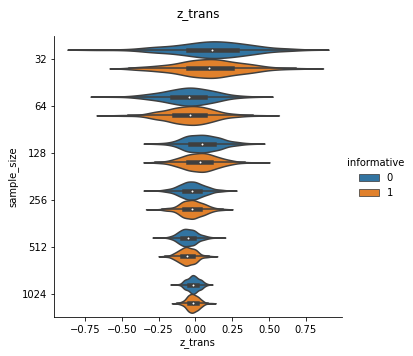

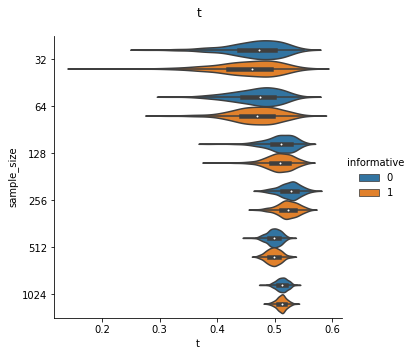

In [216]:
for param in ['v', 'a', 'z_trans', 't']:
    g = sns.catplot(x=param, y="sample_size", hue="informative",
                kind="violin", data=trace_df, title = param)
    g.fig.subplots_adjust(top = 0.9)
    g.fig.suptitle(param)

### END